# Employee Attrition

In [135]:
#import all required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn import tree
import graphviz
import warnings
warnings.filterwarnings("ignore")

## 1.  Data Collection

- Source: Kaggle
- Data: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home
- License: 
    *  Database: https://opendatacommons.org/licenses/odbl/1.0/
    *  Contents: https://opendatacommons.org/licenses/dbcl/1.0/

#### Rule of thumb
* Know all the available dataset for the problem
* Extract data in a format that can be used
* Need skills releated to database (query and management), handling unstructured data (text,video etc) and distributed processing.

In [2]:
data = pd.read_csv('emp_attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 1.1 Get description of data

Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Reference link: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [4]:
#This will give description only for numeric fields
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
#To get description of all columns
data.describe(include = 'all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## 2. Data Cleaning

* Understand meaning of every feature
* Look for any missing values
* Find a way to either drop or fill the values
* Scaling and normalization
* Character encoding
* Handle inconsistent entry
* Use tools like pandas, python, R 

### 2.1 Handling missing values

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Looks like the best dataset!!! No null values :-)

#### But what if we have null values ???? Let's see what we can do in that case.

* Find why that data is missing. Human error or missed during extraction
* Drop missing values. 
* Some ways for filling missing values: 
  - Zero 
  - Mean ( works with normal distribution )
  - Random values from same distribution ( works well with equal distribution ) 
  - Value after missing value (make sense if data set has some logical order)

### 2.2 Encode categorical features(in string) as most of the tools works with numbers

In [7]:
lab_enc = preprocessing.LabelEncoder()
data_encoded = data.apply(lab_enc.fit_transform)

In [9]:
data_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


## 3. Data Exploration

* Find patterns in data through data visualization
   -  Univariate analysis 
      * Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
      * Categorical variable : Bar chart showing frequency in each category 
   -  Bivariate analysis
      * Continous & Continous : Scatter plots to know how continous variables interact with each other
      * Categorical & categorical : Stacked column chart to show how the frequencies are spread between two  
        categorical variables
      * Categorical & Continous : Boxplots, Swamplots or even bar charts
* Detect outliers
* Feature engineering 

### 3.1 Get data distribution between output classes

In [24]:
data_encoded['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

From the above result, we can find that about 82% of people stick to the company while rest of them quit :-(
**** Data is unblanced ****

### 3.2 Finding correlation between variables

In [30]:
data_correlation = data_encoded.corr()

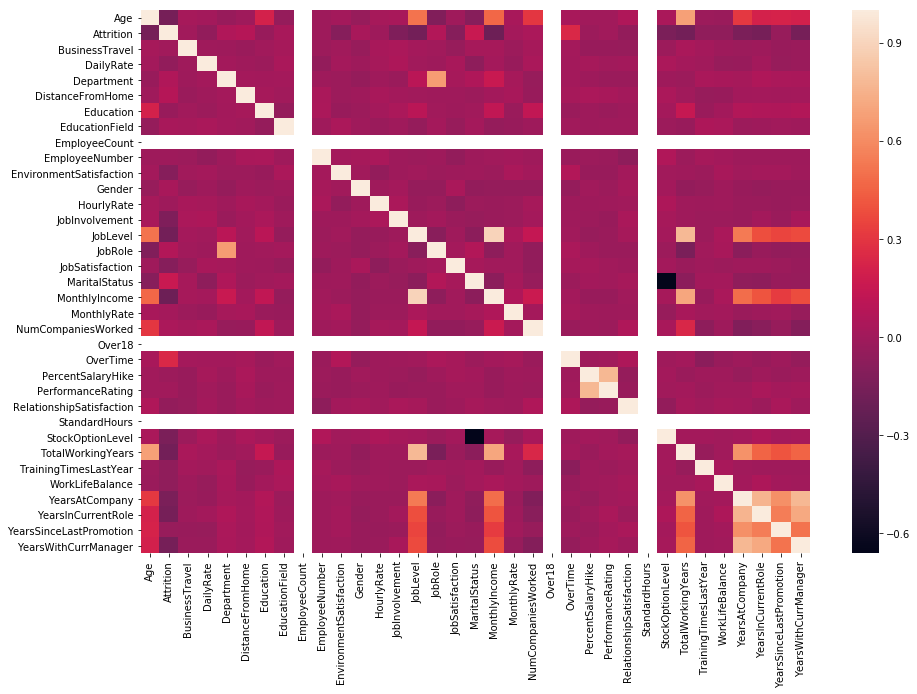

In [36]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

#### Analysis of correlation results (sample analysis)

- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock oprion level are negatively correlated

### 3.3 Understanding relationship between features and finding patterns in data through visualization

(array([30., 38., 24., 30., 25., 30., 16., 35., 36., 23., 22., 29., 31.,
        30., 25., 41., 32., 39., 25., 32., 37., 33., 26., 20., 24., 37.,
        28., 23., 28., 31., 27., 39., 24., 17., 20., 37., 30., 33., 29.,
        33., 35., 23., 31., 39., 30., 32., 30., 24., 28., 29.]),
 array([ 102.  ,  129.94,  157.88,  185.82,  213.76,  241.7 ,  269.64,
         297.58,  325.52,  353.46,  381.4 ,  409.34,  437.28,  465.22,
         493.16,  521.1 ,  549.04,  576.98,  604.92,  632.86,  660.8 ,
         688.74,  716.68,  744.62,  772.56,  800.5 ,  828.44,  856.38,
         884.32,  912.26,  940.2 ,  968.14,  996.08, 1024.02, 1051.96,
        1079.9 , 1107.84, 1135.78, 1163.72, 1191.66, 1219.6 , 1247.54,
        1275.48, 1303.42, 1331.36, 1359.3 , 1387.24, 1415.18, 1443.12,
        1471.06, 1499.  ]),
 <a list of 50 Patch objects>)

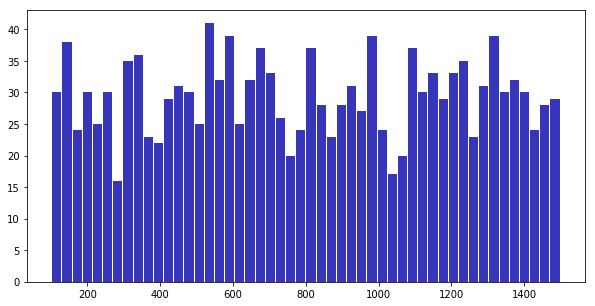

In [112]:
#Analyze distribution of daily rate. Bin range of values and then count number of values fall under each category
plt.rcParams["figure.figsize"] = [10,5]
plt.hist(data['DailyRate'], bins=50, color='#0504aa',
                            alpha=0.8, rwidth=0.9)

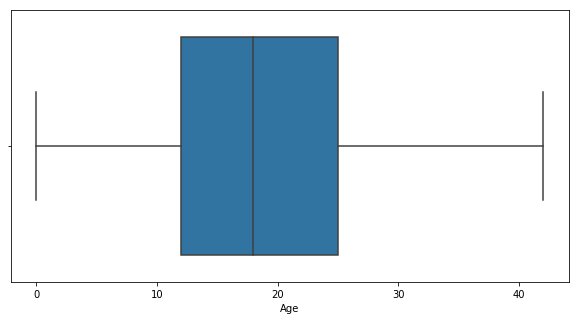

In [153]:
#Age distribution
sns.boxplot(x=data_encoded['Age'],data=data_encoded)

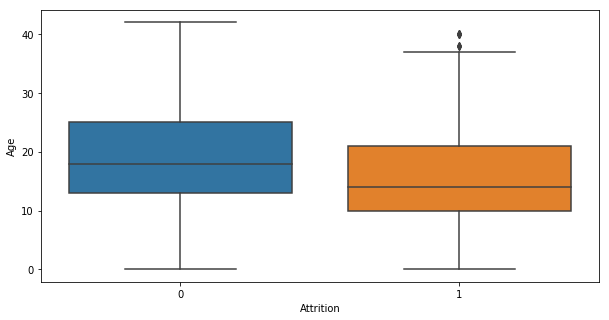

In [151]:
#Age vs Attrition
sns.boxplot(x=data_encoded['Attrition'], y=data_encoded['Age'],data=data_encoded)

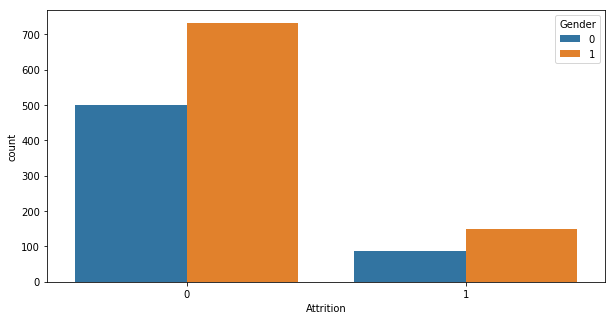

In [159]:
#Attrition vs Gender count 
sns.countplot(x=data_encoded['Attrition'],hue=data_encoded['Gender'], data=data_encoded)

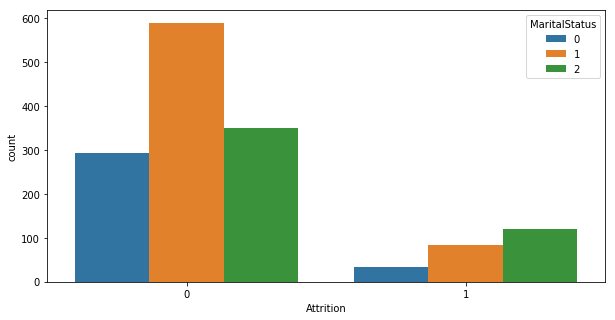

In [160]:
#Attrition vs Gender count 
sns.countplot(x=data_encoded['Attrition'],hue=data_encoded['MaritalStatus'], data=data_encoded)

## 4. Model Development

### 4.1 Creating train and testing data

In [113]:
input_data = data_encoded.drop(['Attrition'], axis=1)

In [114]:
input_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,0,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,0,1,2,...,3,0,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,0,2,3,...,1,0,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,0,3,3,...,2,0,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,4,0,...,3,0,1,6,3,2,2,2,2,2


In [115]:
target_data = data_encoded[['Attrition']]

In [116]:
target_data.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [117]:
input_train, input_test, output_train, output_test = train_test_split(input_data, target_data, test_size=0.2)

### 4.2 Feature selection using recursive feature elimination and cross-validation and using for logistic model

Number of features selected: 24
Features chosen are: ['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


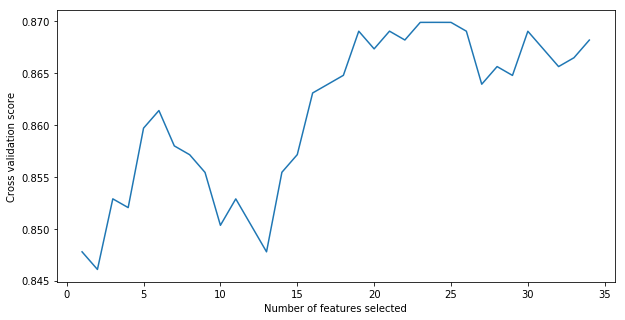

In [118]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=2, scoring='accuracy')
rfecv.fit(input_train, output_train)
print("Number of features selected: %d" % rfecv.n_features_)
print('Features chosen are: %s' % list(input_train.columns[rfecv.support_]))
selected_features = list(input_train.columns[rfecv.support_])


plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [119]:
new_logistic_tr_inp = input_train[selected_features]
new_logistic_ts_inp = input_test[selected_features]
logistic_cls = LogisticRegression()
logistic_cls.fit(new_logistic_tr_inp, output_train)
predicted = logistic_cls.predict(new_logistic_ts_inp)
print('Accuray of logistic regression model is ', accuracy_score(output_test, predicted))

Accuray of logistic regression model is  0.8503401360544217


### 4.3 Decision Tree Classifier and finding important features

In [143]:
dt = tree.DecisionTreeClassifier()
dt.fit(input_train, output_train)
predicted = dt.predict(input_test)
print('Accuray of the model is ', accuracy_score(output_test, predicted))

Accuray of the model is  0.7619047619047619


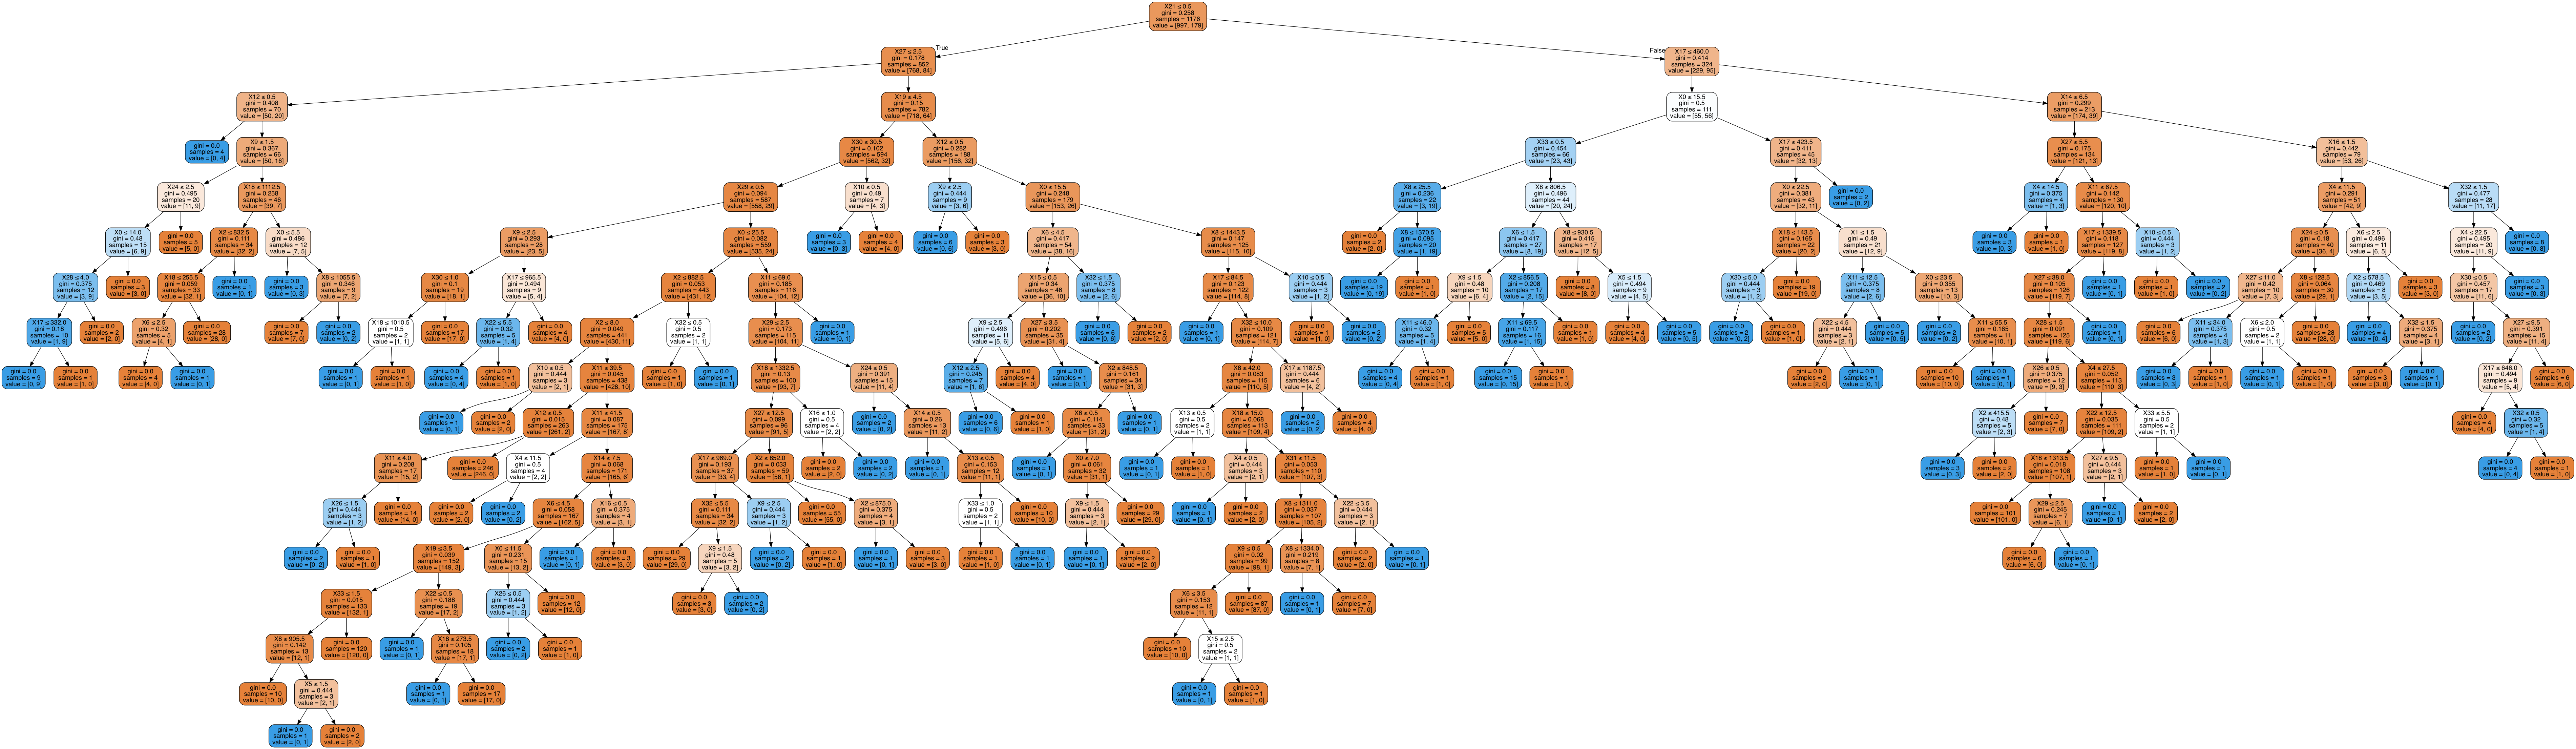

In [147]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
#
data = StringIO()
export_graphviz(dt, out_file=data, 
                         filled=True, rounded=True,  
                         special_characters=True)  
dt_graph = pydotplus.graph_from_dot_data(data.getvalue())  
Image(dt_graph.create_png())

### 4.4 Random Forest Classifier and finding important features

In [126]:
rf = RandomForestClassifier()
rf.fit(input_train, output_train)
predicted = rf.predict(input_test)

In [127]:
print('Accuray of the model is ', accuracy_score(output_test, predicted))

Accuray of the model is  0.8435374149659864


In [128]:
imp_feature_indices = np.argsort(rf.feature_importances_)[::-1]
feature_imp = rf.feature_importances_
feature_df = pd.DataFrame(feature_imp,index = input_train.columns,
                           columns=['importance']).sort_values('importance',ascending=False)

In [129]:
feature_df

,importance
MonthlyRate,0.065146
Age,0.061930
MonthlyIncome,0.059934
EmployeeNumber,0.052214
TotalWorkingYears,0.052163
OverTime,0.047574
DailyRate,0.046675
PercentSalaryHike,0.040494
YearsAtCompany,0.038513
DistanceFromHome,0.036763


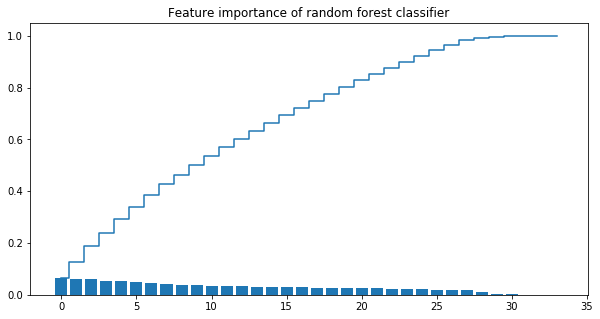

In [148]:
# feature importance graph
plt.title('Feature importance of random forest classifier')
plt.bar(range(len(imp_feature_indices)), feature_imp[imp_feature_indices],  align="center")
plt.step(range(len(imp_feature_indices)), np.cumsum(feature_imp[imp_feature_indices]), where='mid')

### 5. Conclusion

Solved two questions 
- Getting factors contributing to attrition : feature importance techniques
- Model to predict attrition : Built logistic, decision tree and random forest for the same.
    
This is base model and a lot more can be done....
- Try tuning existing model
- Try other classifiers
- Try ensemble methods